# Introductory PyBigDFT tour - Basic functionalities and first calculations
We start here by presenting a walkthrough overview of using the PyBigDFT library to set up and run BigDFT calculations.

The main documentation of the BigDFT code can be found in the [User Page](https://l_sim.gitlab.io/bigdft-suite/users/guide.html), and informations about the PyBigDFT API can be found [here](https://l_sim.gitlab.io/bigdft-suite/PyBigDFT/build/html/index.html)


For this tutorial, we have to ensure at least the installation of the bigdft client.

The basic installation can be performed with those commands:

In [6]:
!pip install pybigdft py3dmol pyfutile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# System Generation
In this first overview, we will introduce the data structures available in PyBigDFT for creating and manipulating the systems we want to study (whether molecular or solid state). 

## 1) Atom Class
Any system we want to study is going to be made up of atoms. Considering the features available in Python, the best way to store information about atoms is a dictonary (`dict`), which are serializable in human readable formats like json or yaml. For example, in BigDFT, we use yaml dictonaries. 

In [7]:
from yaml import dump
datm = {"sym": "H", "r": [1, 0, 0], "units": "angstroem"}
print(dump(datm))

r:
- 1
- 0
- 0
sym: H
units: angstroem



Nonetheless, just manipulating a `dict` by itself is error prone, and you might want some extra helpful subroutines. For these reasons, we've wrapped up a `dict` in the Atom class.

In [8]:
from BigDFT.Atoms import Atom
atom = Atom(datm)
# the following also works
atom = Atom({"sym": "H", "r": [1, 0, 0], "units": "angstroem"})
atom = Atom({"H": [1, 0, 0], "units": "angstroem"})
print(dump(atom))

!!python/object:BigDFT.Atoms.Atom
store:
  H:
  - 1
  - 0
  - 0
  units: angstroem



Some of in-built subroutines for Atom class manipulation are demonstrated below.

In [9]:
print(atom.sym)
print(atom.atomic_number)
print(atom.get_position("angstroem"))
print(atom.get_position("bohr"))

H
1
[1.0, 0.0, 0.0]
[1.8897261245650618, 0.0, 0.0]


With this approach, we nonetheless retain the flexibility of a `dict`.

In [10]:
atom["source"] = "tutorial"
print(atom["source"])
for k, v in atom.items():
    print(k, v)

tutorial
H [1, 0, 0]
units angstroem
source tutorial


## 2) Fragment Class
We won't do many calculations involving a single atom, instead we want to put together groups of atoms. In this case, we will use a list as our model data structure, with the wrapper class refered to as a `Fragment`. 

In [11]:
atm1 = Atom({"sym": "O", "r": [2.3229430273, 1.3229430273, 1.7139430273], "units": "angstroem"})
atm2 = Atom({"sym": "H", "r": [2.3229430273, 2.0801430273, 1.1274430273], "units": "angstroem"})
atm3 = Atom({"sym": "H", "r": [2.3229430273, 0.5657430273000001, 1.1274430273], "units": "angstroem"})

In [12]:
from BigDFT.Fragments import Fragment
frag1 = Fragment([atm1, atm2, atm3])
print(len(frag1))
print(frag1.centroid)

3
[4.38972612 2.5        2.5       ]


It's also possible to build up a fragment in a more step by step process.

In [13]:
frag1 = Fragment()
frag1.append(atm1)
frag1 += Fragment([atm2])
frag1.extend(Fragment([atm3]))

We added features to translate and rotate a fragment.

In [14]:
from copy import deepcopy
frag2 = deepcopy(frag1)
frag2.translate([10, 0, 0])
frag2.rotate(x=90, units="degrees")

In [15]:
print(dump(frag2))

!!python/object:BigDFT.Fragments.Fragment
atoms:
- !!python/object:BigDFT.Atoms.Atom
  store:
    r:
    - 14.389726124565062
    - 1.7611170852950608
    - 2.499999999999999
    sym: O
    units: bohr
- !!python/object:BigDFT.Atoms.Atom
  store:
    r:
    - 14.389726124565062
    - 2.86944145735247
    - 3.930900621520664
    sym: H
    units: bohr
- !!python/object:BigDFT.Atoms.Atom
  store:
    r:
    - 14.389726124565062
    - 2.86944145735247
    - 1.0690993784793343
    sym: H
    units: bohr
conmat: null
frozen: null
q1: null
q2: null



## 3) System Class
Many electronic structure codes top off at the list of atoms level, but in PyBigDFT we go one step further. At the top, we have the `System` class which is again based on a `dict`.

In [16]:
from BigDFT.Systems import System
sys = System()
sys["WAT:0"] = frag1
sys["WAT:1"] = frag2

In [17]:
print(dump(sys))

!!python/object:BigDFT.Systems.System
cell: !!python/object:BigDFT.UnitCells.UnitCell
  cell:
  - - .inf
    - 0
    - 0
  - - 0
    - .inf
    - 0
  - - 0
    - 0
    - .inf
conmat: null
store:
  WAT:0: !!python/object:BigDFT.Fragments.Fragment
    atoms:
    - !!python/object:BigDFT.Atoms.Atom
      store:
        r:
        - 2.3229430273
        - 1.3229430273
        - 1.7139430273
        sym: O
        units: angstroem
    - !!python/object:BigDFT.Atoms.Atom
      store:
        r:
        - 2.3229430273
        - 2.0801430273
        - 1.1274430273
        sym: H
        units: angstroem
    - !!python/object:BigDFT.Atoms.Atom
      store:
        r:
        - 2.3229430273
        - 0.5657430273000001
        - 1.1274430273
        sym: H
        units: angstroem
    conmat: null
    frozen: null
    q1: null
    q2: null
  WAT:1: !!python/object:BigDFT.Fragments.Fragment
    atoms:
    - !!python/object:BigDFT.Atoms.Atom
      store:
        r:
        - 14.389726124565062
   

In principle, any dictionary key is fine to use for our `System` class, but in practice we follow the convention of giving it a name and identifier separated by a colon. To summarize the hierarchy, let's iterate over our `System`.

In [18]:
for fragid, frag in sys.items():
    print(fragid)
    for atm in frag:
        print(dict(atm))

WAT:0
{'sym': 'O', 'r': [2.3229430273, 1.3229430273, 1.7139430273], 'units': 'angstroem'}
{'sym': 'H', 'r': [2.3229430273, 2.0801430273, 1.1274430273], 'units': 'angstroem'}
{'sym': 'H', 'r': [2.3229430273, 0.5657430273000001, 1.1274430273], 'units': 'angstroem'}
WAT:1
{'sym': 'O', 'r': [14.389726124565062, 1.7611170852950608, 2.499999999999999], 'units': 'bohr'}
{'sym': 'H', 'r': [14.389726124565062, 2.86944145735247, 3.930900621520664], 'units': 'bohr'}
{'sym': 'H', 'r': [14.389726124565062, 2.86944145735247, 1.0690993784793343], 'units': 'bohr'}


Now that we've reached the top level, let's visualize the system we have built.

In [19]:
_ = sys.display()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

The visualization module has identified that there are two separate fragments, and colored them accordingly. Of course if we merged our fragments, the visualization would look different.

In [20]:
sys2 = System()
sys2["COM:0"] = sum(sys.values())

In [21]:
_ = sys2.display()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Multiple Views

We can take advantage of deepcopying to construct multiple views of the same system. For example, we might want to have two separate views of the same set of atoms. In one view, we split the set into two molecules, and the other we have just one big fragment. This might be convenient if, for example, we want to be able to rotate the entire system as a group.

In [22]:
#Reminder of standard shallow copy
a = {"x": "1"}
b = {"x": "2"}
my_list = [a, b]
print(my_list)
a["x"] = 3
print(my_list)

[{'x': '1'}, {'x': '2'}]
[{'x': 3}, {'x': '2'}]


In [23]:
#Deep copy
sep = deepcopy(sys)
joint = System()
joint["COM:0"] = sum(sep.values())

In [24]:
joint["COM:0"].rotate(y=90, units="degrees")

In [25]:
_ = sep.display()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [26]:
_  = joint.display()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Extended Systems
For building and manipulating extended systems, the extra ingredient required is a `UnitCell`. 

In [27]:
from BigDFT.UnitCells import UnitCell
sys.cell = UnitCell([7.0, 7.0, 7.0], units="angstroem")

In [28]:
_ = sys.display()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

We see that the minimum image convention has wrapped the red fragment around so that it is now on the left side. We can inspect this position values closer from the `Atom` class.

In [29]:
for fragid, frag in sys.items():
    print(fragid)
    for at in frag:
        print(at.get_position("angstroem"), at.get_position("angstroem", cell=sys.cell))

WAT:0
[2.3229430273, 1.3229430273, 1.7139430273] [2.3229430273, 1.3229430273, 1.7139430273]
[2.3229430273, 2.0801430273, 1.1274430273] [2.3229430273, 2.0801430273, 1.1274430273]
[2.3229430273, 0.5657430273000001, 1.1274430273] [2.3229430273, 0.5657430273000001, 1.1274430273]
WAT:1
[7.6147151365, 0.9319430273000001, 1.3229430272999996] [0.6147151365000005, 0.9319430273000001, 1.3229430272999996]
[7.6147151365, 1.5184430273000002, 2.0801430272999997] [0.6147151365000005, 1.5184430273000002, 2.0801430272999997]
[7.6147151365, 1.5184430273000002, 0.5657430272999997] [0.6147151365000005, 1.5184430273000002, 0.5657430272999997]


We also can get accessed to fractional units this way.

In [30]:
for fragid, frag in sys.items():
    print(fragid)
    for at in frag:
        print(at.get_position("reduced", cell=sys.cell))

WAT:0
[0.3318490039, 0.18899186104285715, 0.2448490039]
[0.3318490039, 0.29716328961428573, 0.1610632896142857]
[0.3318490039, 0.08082043247142859, 0.1610632896142857]
WAT:1
[0.08781644807142865, 0.1331347181857143, 0.1889918610428571]
[0.08781644807142865, 0.21692043247142861, 0.2971632896142857]
[0.08781644807142865, 0.21692043247142861, 0.08082043247142852]


The ```sys.get_posinp()``` method provides the information written in `YAML` markup format:

In [31]:
sys.get_posinp()

{'positions': [{'O': [2.3229430273, 1.3229430273, 1.7139430273],
   'frag': ['WAT', '0']},
  {'H': [2.3229430273, 2.0801430273, 1.1274430273], 'frag': ['WAT', '0']},
  {'H': [2.3229430273, 0.5657430273000001, 1.1274430273],
   'frag': ['WAT', '0']},
  {'O': [0.6147151365000005, 0.9319430273000001, 1.3229430272999996],
   'frag': ['WAT', '1']},
  {'H': [0.6147151365000005, 1.5184430273000002, 2.0801430272999997],
   'frag': ['WAT', '1']},
  {'H': [0.6147151365000005, 1.5184430273000002, 0.5657430272999997],
   'frag': ['WAT', '1']}],
 'units': 'angstroem',
 'cell': [7.0, 7.0, 7.0]}

## Calculation examples
1 - Simple finite system

2 - Periodic system

We now start to perform some basic calculations with the code.
Such calculation can be executed:

 A. On the local workstation if you have the bigdft code installed.

 B. On google colab with the Installation method "full-suite" (see the 0.Installation.ipynb) notebook of this project.

 C. We can use the `dry-run` approach where we do not actually run the calculation but we employ previously existing logfiles of the same systems.

 We here employ the solution C. In order to do that we have to compy the data from the bigdft-school database repo.


In [42]:
!wget https://raw.githubusercontent.com/BigDFT-group/bigdft-school/main/packaging/install.py 2> /dev/null
import install

In [49]:
install.data('data/Enccs_basics.tar.xz')

Executing: wget https://gitlab.com/luigigenovese/bigdft-school/-/raw/main/data/Enccs_basics.tar.xz -O Enccs_basics.tar.xz
--2022-11-14 21:54:20--  https://gitlab.com/luigigenovese/bigdft-school/-/raw/main/data/Enccs_basics.tar.xz
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22228 (22K) [application/octet-stream]
Saving to: ‘Enccs_basics.tar.xz’

     0K .......... .......... .                               100% 15.9M=0.001s

2022-11-14 21:54:20 (15.9 MB/s) - ‘Enccs_basics.tar.xz’ saved [22228/22228]


Executing: mkdir -p /content

Executing: tar xJf Enccs_basics.tar.xz -C .



1 - Let us create a simple system using the tools described so far and run a calculation with a wavelet grid spacing of $0.4$ bohr (good for the large majority of the systems) and the PBE functional. A logfile is generated from which we can access the computed properties. This logfile has built in properties and can be accessed like a dictionary.

In [44]:
# Create Three Atoms
at1 = Atom({"H": [0, 0, 0], "units": "bohr"})
at2 = Atom({"H": [0, 0, 1.4], "units": "bohr"})
at3 = Atom({"He": [10, 0, 0], "units": "bohr"})
# Construct a System from Two Fragments (H2, He)
sys = System()
sys["H2:1"] = Fragment([at1, at2])
sys["He:2"] = Fragment([at3])

# Iterate Over The System to inspect the atoms positions
for at in sys.get_atoms():
    print(at.sym, at.get_position())
# or alternatively, two-level iteration (fragment first)
for fragid, frag in sys.items():
    print(fragid)
    for at in frag:
        print(' ', at.sym, at.get_position())

H [0.0, 0.0, 0.0]
H [0.0, 0.0, 1.4]
He [10.0, 0.0, 0.0]
H2:1
  H [0.0, 0.0, 0.0]
  H [0.0, 0.0, 1.4]
He:2
  He [10.0, 0.0, 0.0]


In [45]:
# this is what we have created
sys.display()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [50]:
from BigDFT.Inputfiles import Inputfile
inp = Inputfile()
inp.set_hgrid(0.4)
inp.set_xc("PBE")
# we remove the calculation of the forces
inp["perf"] = {"calculate_forces": False}

In [51]:
from BigDFT.Calculators import SystemCalculator
calc = SystemCalculator(skip=True, verbose=False)

In [52]:
log = calc.run(sys=sys, input=inp, name="quick", run_dir="scratch")

In [53]:
#some basic info
print(log.energy)
print(list(log.evals))
print(log.log["Memory Consumption Report"]
             ["Memory occupation"])

-4.0546151576846
[BandArray([[-0.57600357, -0.38118857]])]
{'Peak Value (MB)': 230.69, 'for the array': 'f_i', 'in the routine': 'vxcpostprocessing', 'Memory Peak of process': 'unknown'}


We have "executed" (the calculation result is provided with the school material here) a very simple calculation with two Kohn-Sham orbitals. The description of the possible input parameters and how to trigger larger calculations (even on remote computers) will be provided in the forthcoming tutorials.


2 - We setup a BCC unit cell of iron and perform the calculation using a 2x2x2 k-point grid with a Monkhorst-Pack grid.

In [54]:
from BigDFT.UnitCells import UnitCell
# one single periodic atom
pat = Atom({"Fe": [0, 0, 0], "units": "angstroem"})
psys = System({"CEL:0": Fragment([pat])})
psys.cell = UnitCell([2.867, 2.867, 2.867], units="angstroem")

In [55]:
psys.display()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [56]:
# very small k-point mesh, just for comparison
inp = Inputfile()
inp.set_hgrid(0.3)
inp.set_xc("LDA") # can be omitted as this is the default
inp["kpt"] = {"method": "mpgrid", "ngkpt": [2, 2, 2]}

In [57]:
log = calc.run(sys=psys, input=inp, name="psys", run_dir="scratch")

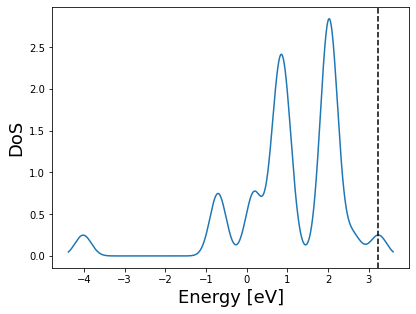

In [58]:
_ = log.get_dos().plot()